# **Mall Customers**

## **Load the data**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
print(df.shape)
df.head(10)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### EDA

In [ ]:
print(df.isnull().sum())
print('\n',df.describe())
print('\n',df.info())
print('\n Duplicated values:', df.duplicated().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------            

## **Generating Elbow Graph**

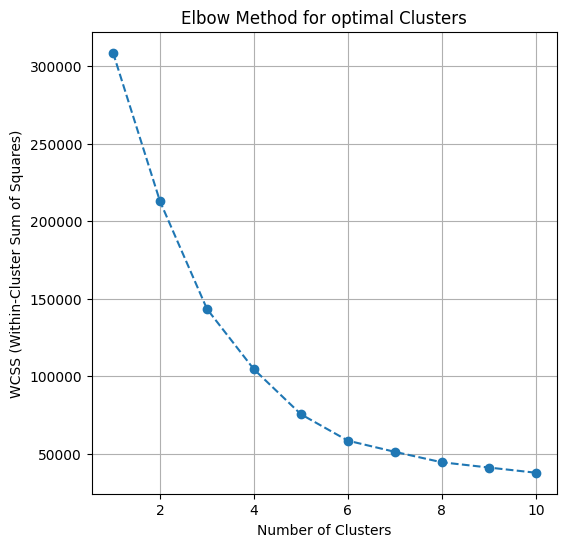

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
X=df.iloc[:,[2,3,4]].values
#Empty list to store within-cluster sum of squares
wcss=[]
rang=range(1,11)
#Try different no of clusters from 1 to 10
for i in rang:
 km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 km.fit(X)
 wcss.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(rang, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()# is what displays the graph-like lines
plt.show()

## **Visualize Clusters**

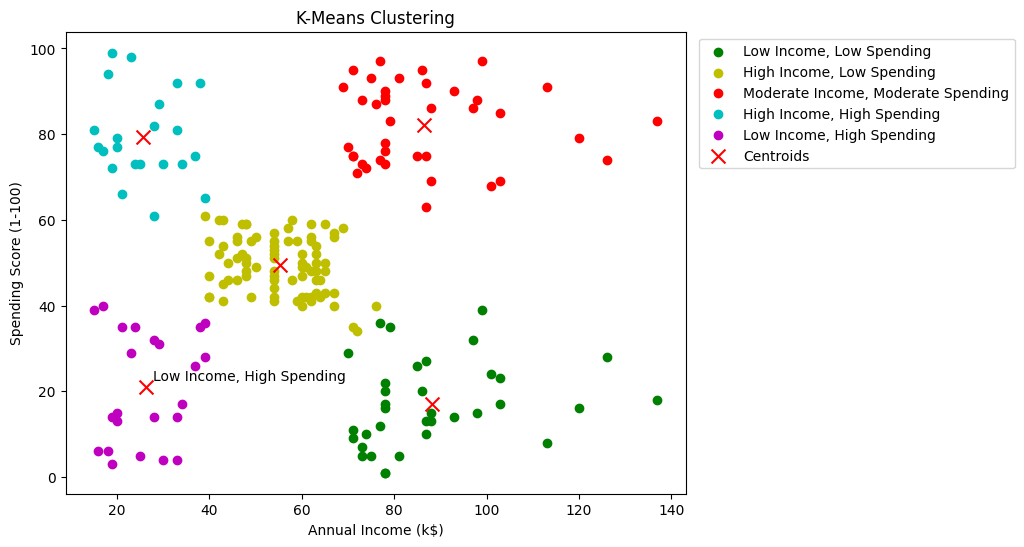

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
wainaina = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
# Specify the optimal number of clusters
optimal_clusters = 5
# User-defined attributes to visualize (you can modify this)
attributes_to_visualize = ['Annual Income (k$)', 'Spending Score (1-100)']
# Select the data for visualization based on user-defined attributes
X = wainaina[attributes_to_visualize].values
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
# Add the cluster labels to the dataset
wainaina['Cluster'] = y_kmeans
# Specify colors for each cluster (modify this list with your preferred colors)
cluster_colors = ['g', 'y', 'r', 'c', 'm']
# Specify labels for each cluster (modify this list with your preferred labels)
cluster_labels = ['Low Income, Low Spending', 'High Income, Low Spending', 'Moderate Income, Moderate Spending', 'High Income, High Spending', 'Low Income, High Spending']
# Visualize the clusters with specified colors and X symbol for centroids
plt.figure(figsize=(8, 6))
for cluster_num in range(optimal_clusters):
 cluster_data = X[y_kmeans == cluster_num]
 plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_labels[cluster_num], c=cluster_colors[cluster_num])
# Annotate the cluster with the label near its centroid
centroid = kmeans.cluster_centers_[cluster_num]
plt.annotate(cluster_labels[cluster_num], centroid, xytext=(5, 5), textcoords='offset points', fontsize=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
# Move the legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.title('K-Means Clustering')
plt.xlabel(attributes_to_visualize[0]) # Set X-axis label
plt.ylabel(attributes_to_visualize[1]) # Set Y-axis label
plt.show()

In [ ]:
cluster_data = X[y_kmeans == cluster_num]
cluster_data

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]])

# **K-Means Clustering using dummy data**

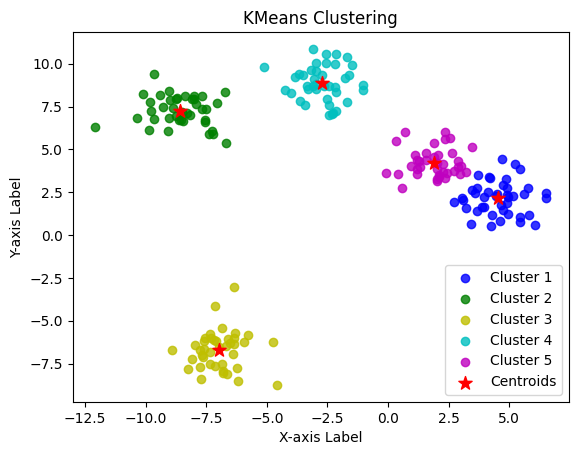

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Create a dataset of 200 samples and 5 clusters
features, labels = make_blobs(n_samples=200, centers=5, random_state=42 # Add a random state for reproducibility
)
# Instantiate the model with 5 'K' clusters and 10 iterations with different centroid seed
model = KMeans(
n_clusters=5,
n_init=10,
random_state=42
)
# Train the model
model.fit(features)
# Make a prediction on the data
p_labels = model.predict(features)
plt.style.use('default')
# Define a list of colors for the clusters
cluster_colors = ['b', 'g', 'y', 'c', 'm']
# Iterate through the clusters and plot them with different colors and labels
for cluster_num in range(5):
 cluster_data = features[p_labels == cluster_num]
 plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.8, label=f'Cluster {cluster_num + 1}', c=cluster_colors[cluster_num])
cluster_centers = model.cluster_centers_
cs_x = cluster_centers[:, 0]
cs_y = cluster_centers[:, 1]
# Plot centroids with a different color (e.g., yellow)
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.show()

# **Elbow Generation using dummy data**

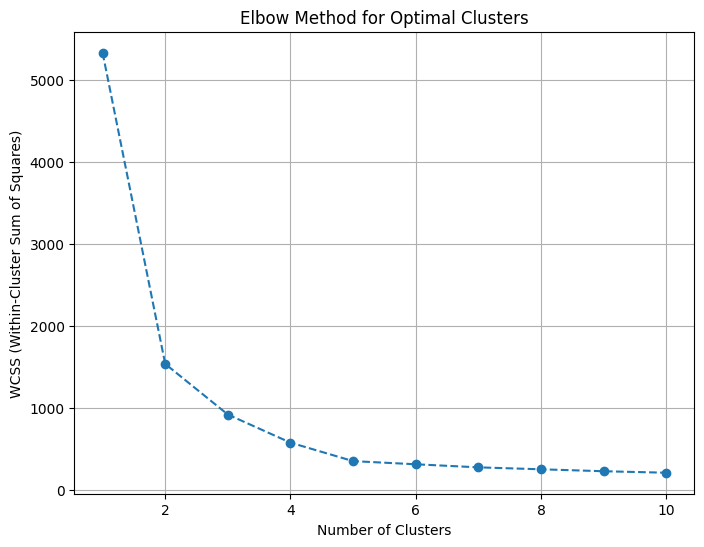

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Create a dataset of 200 samples and 5 clusters
features, labels = make_blobs(
n_samples=200,
centers=5
)
# Create an empty list to store WCSS (within-cluster sum of squares) values
wcss = []
# Try different numbers of clusters from 1 to 10
for i in range(1, 11):
 model = KMeans(n_clusters=i, n_init=10, random_state=42)
 model.fit(features)
 wcss.append(model.inertia_)
# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()